# Régression linéaire

In [1]:
# Import des bibliothèques nécessaires
import numpy as np  # Import de la bibliothèque NumPy pour le calcul numérique
import pandas as pd  # Import de la bibliothèque Pandas pour la manipulation des données
import seaborn as sns  # Import de la bibliothèque Seaborn pour la visualisation de données statistiques
import matplotlib.pyplot as plt  # Import de la bibliothèque Matplotlib pour la visualisation de données
import sklearn  # Import de la bibliothèque scikit-learn pour l'apprentissage automatique


In [2]:
data_set = pd.read_csv('avito_car_dataset_ALL.csv', encoding='latin1')  # Charger le jeu de données en utilisant l'encodage latin1
data_set.head()  # Afficher les premières lignes du jeu de données


,Unnamed: 0,Lien,Ville,Secteur,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,0,https://www.avito.ma/fr/massira_2/voitures/FIA...,Temara,Massira 2,Fiat,Punto,2007,200 000 - 249 999,Diesel,5,...,False,False,True,False,False,False,True,False,False,60000
1,1,https://www.avito.ma/fr/temara/voitures/Dacia_...,Temara,NaN,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,70000
2,2,https://www.avito.ma/fr/casablanca/voitures/Da...,Casablanca,NaN,Dacia,Dokker,2014,160 000 - 169 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,90000
3,3,https://www.avito.ma/fr/casablanca/voitures/to...,Casablanca,NaN,Volkswagen,Touareg,2005,0 - 4 999,Diesel,10,...,False,False,False,False,False,False,False,False,False,90000
4,4,https://www.avito.ma/fr/dakhla/voitures/Toyota...,Dakhla,NaN,Toyota,Prado,2007,200 000 - 249 999,Diesel,12,...,False,False,True,False,False,False,True,False,False,97000


In [3]:
data_set.shape

(24776, 32)

In [4]:
data_set.info()  # Affiche des informations sur les colonnes, les types de données et les valeurs manquantes dans le jeu de données.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          24776 non-null  int64  
 1   Lien                                24776 non-null  object 
 2   Ville                               24776 non-null  object 
 3   Secteur                             10810 non-null  object 
 4   Marque                              24776 non-null  object 
 5   Modèle                              24776 non-null  object 
 6   Année-Modèle                        24776 non-null  int64  
 7   Kilométrage                         24776 non-null  object 
 8   Type de carburant                   24776 non-null  object 
 9   Puissance fiscale                   24776 non-null  int64  
 10  Boite de vitesses                   24776 non-null  object 
 11  Nombre de portes                    20396

In [5]:
# Calculer le nombre de valeurs manquantes dans chaque colonne du jeu de données
data_set.isna().sum()


Unnamed: 0                                0
Lien                                      0
Ville                                     0
Secteur                               13966
Marque                                    0
Modèle                                    0
Année-Modèle                              0
Kilométrage                               0
Type de carburant                         0
Puissance fiscale                         0
Boite de vitesses                         0
Nombre de portes                       4380
Origine                                5287
Première main                          6209
État                                   6678
Jantes aluminium                          0
Airbags                                   0
Climatisation                             0
Système de navigation/GPS                 0
Toit ouvrant                              0
Sièges cuir                               0
Radar de recul                            0
Caméra de recul                 

In [6]:
# Remplir les valeurs manquantes dans la colonne 'Nombre de portes' avec -1
data_set['Nombre de portes'] = data_set['Nombre de portes'].fillna(-1)

# Remplir toutes les autres valeurs manquantes avec 'n/d'
data_set = data_set.fillna('n/d')

# Afficher les premières lignes du jeu de données après le remplissage des valeurs manquantes
data_set.head()


,Unnamed: 0,Lien,Ville,Secteur,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,0,https://www.avito.ma/fr/massira_2/voitures/FIA...,Temara,Massira 2,Fiat,Punto,2007,200 000 - 249 999,Diesel,5,...,False,False,True,False,False,False,True,False,False,60000
1,1,https://www.avito.ma/fr/temara/voitures/Dacia_...,Temara,n/d,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,70000
2,2,https://www.avito.ma/fr/casablanca/voitures/Da...,Casablanca,n/d,Dacia,Dokker,2014,160 000 - 169 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,90000
3,3,https://www.avito.ma/fr/casablanca/voitures/to...,Casablanca,n/d,Volkswagen,Touareg,2005,0 - 4 999,Diesel,10,...,False,False,False,False,False,False,False,False,False,90000
4,4,https://www.avito.ma/fr/dakhla/voitures/Toyota...,Dakhla,n/d,Toyota,Prado,2007,200 000 - 249 999,Diesel,12,...,False,False,True,False,False,False,True,False,False,97000


In [7]:
data_set.isna().sum()

Unnamed: 0                            0
Lien                                  0
Ville                                 0
Secteur                               0
Marque                                0
Modèle                                0
Année-Modèle                          0
Kilométrage                           0
Type de carburant                     0
Puissance fiscale                     0
Boite de vitesses                     0
Nombre de portes                      0
Origine                               0
Première main                         0
État                                  0
Jantes aluminium                      0
Airbags                               0
Climatisation                         0
Système de navigation/GPS             0
Toit ouvrant                          0
Sièges cuir                           0
Radar de recul                        0
Caméra de recul                       0
Vitres électriques                    0
ABS                                   0


In [8]:
data_set.nunique()
#verification

Unnamed: 0                            24776
Lien                                   8230
Ville                                   191
Secteur                                 402
Marque                                   23
Modèle                                  369
Année-Modèle                             33
Kilométrage                              36
Type de carburant                         4
Puissance fiscale                        10
Boite de vitesses                         3
Nombre de portes                          3
Origine                                   5
Première main                             3
État                                      7
Jantes aluminium                          1
Airbags                                   2
Climatisation                             2
Système de navigation/GPS                 1
Toit ouvrant                              1
Sièges cuir                               1
Radar de recul                            1
Caméra de recul                 

In [9]:
columns_to_remove = ['Lien', 'Jantes aluminium', 'Système de navigation/GPS', 'Toit ouvrant', 
                     'Sièges cuir', 'Radar de recul', 'Caméra de recul', 
                     'Vitres électriques', 'Régulateur de vitesse', 
                     'Limiteur de vitesse', 'Ordinateur de bord', 
                     'Verrouillage centralisé à distance', 'Unnamed: 0']

data_set.drop(columns=columns_to_remove, inplace=True)  # Supprimer les colonnes spécifiées
data_set.columns  # Afficher les noms de colonnes restants


Index(['Ville', 'Secteur', 'Marque', 'Modèle', 'Année-Modèle', 'Kilométrage',
       'Type de carburant', 'Puissance fiscale', 'Boite de vitesses',
       'Nombre de portes', 'Origine', 'Première main', 'État', 'Airbags',
       'Climatisation', 'ABS', 'ESP', 'CD/MP3/Bluetooth', 'Prix'],
      dtype='object')

In [10]:
data_set = data_set.rename(columns={
    'Modèle': 'Modele',
    'Année-Modèle': 'Annee-modele',
    'Kilométrage': 'Kilometrage',
    'État': 'Etat',
    'Première main': 'Premiere-main',
    'Type de carburant' : 'Type-carburant',
    'Puissance fiscale':'Puissance-fiscale',
    'Boite de vitesses':'Boite-vitesses',
    'Nombre de portes':'Nombre-portes'               
})  # Renommer les colonnes selon le mapping spécifié
data_set.columns  # Afficher les noms de colonnes mis à jour


Index(['Ville', 'Secteur', 'Marque', 'Modele', 'Annee-modele', 'Kilometrage',
       'Type-carburant', 'Puissance-fiscale', 'Boite-vitesses',
       'Nombre-portes', 'Origine', 'Premiere-main', 'Etat', 'Airbags',
       'Climatisation', 'ABS', 'ESP', 'CD/MP3/Bluetooth', 'Prix'],
      dtype='object')

In [11]:
data_set.shape

(24776, 19)

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Appliquer le LabelEncoder sur les colonnes spécifiées
data_set['CD/MP3/Bluetooth'] = label_encoder.fit_transform(data_set['CD/MP3/Bluetooth'])
data_set['ESP'] = label_encoder.fit_transform(data_set['ESP'])
data_set['ABS'] = label_encoder.fit_transform(data_set['ABS'])
data_set['Climatisation'] = label_encoder.fit_transform(data_set['Climatisation'])
data_set['Airbags'] = label_encoder.fit_transform(data_set['Airbags'])
data_set['Premiere-main'] = label_encoder.fit_transform(data_set['Premiere-main'])
data_set['Origine'] = label_encoder.fit_transform(data_set['Origine'])
data_set['Boite-vitesses'] = label_encoder.fit_transform(data_set['Boite-vitesses'])
data_set['Type-carburant'] = label_encoder.fit_transform(data_set['Type-carburant'])


In [13]:
import category_encoders as ce  # Importer le module category_encoders pour l'encodage de variables catégorielles

etats = set(data_set['Etat'].values)  # Extraire les valeurs uniques de la colonne 'Etat' dans un ensemble
etats  # Afficher les valeurs uniques extraites


{'Bon', 'Correct', 'Endommagé', 'Excellent', 'Pour Pièces', 'Très bon', 'n/d'}

In [14]:
# Définir le dictionnaire de correspondance des variables ordinales
etat_dict = {'n/d': 0, 'Endommagé': 1, 'Pour Pièces': 2, 'Correct': 3, 'Bon': 4,  'Très bon': 5, 'Excellent': 6}

# Créer un encodeur ordinal avec le mapping spécifié
ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col': 'Etat', 'mapping': etat_dict}])

# Appliquer l'encodage ordinal sur le jeu de données et créer un nouveau jeu de données encodé
encoded_data_set = ordinal_encoder.fit_transform(data_set)

# Extraire la colonne transformée et l'assigner au DataFrame original
data_set['Etat_enc'] = encoded_data_set['Etat']


In [15]:
def convert_and_classify_Annee(annee):

    if 1990 <= annee <= 1995:
        category = 1
    elif 1996 <= annee <= 2000:
        category = 2
    elif 2001 <= annee <= 2005:
        category = 3
    elif 2006 <= annee <= 2010:
        category = 4
    elif 2011 <= annee <= 2015:
        category = 5
    elif 2016 <= annee <= 2020:
        category = 6
    elif 2021 <= annee <= 2023:
        category = 7
    elif annee <= 2024:
        category = 8
        
    return category

# Apply the function to the 'Kilometrage' column and extract the results into two new columns
data_set['Annee-modele'] = data_set['Annee-modele'].apply(lambda x: pd.Series(convert_and_classify_Annee(x)))

*Kilometrage :*
- Max : 450000 - 499999
- Min : 0 - 4999
- Step : 50k 

```python 
data_set['Min-km'].unique()
array([200000, 400000, 160000,      0, 180000,  75000,  10000, 120000,
       110000,  35000,  90000, 190000,  50000, 300000,  30000,  20000,
        80000, 140000, 130000, 250000,  95000, 100000, 170000,  65000,
         5000,  55000,  25000,  70000,  15000, 350000,  60000,  40000,
        45000,  85000, 150000, 450000])

data_set['Max-km'].unique()
array([249999, 449999, 169999,   4999, 189999,  79999,  14999, 129999,
       119999,  39999,  94999, 199999,  54999, 349999,  34999,  24999,
        84999, 149999, 139999, 299999,  99999, 109999, 179999,  69999,
         9999,  59999,  29999,  74999,  19999, 399999,  64999,  44999,
        49999,  89999, 159999, 499999])
```

In [16]:
def convert_and_classify_kilometrage(kilometrage_str):
    # Supprimer les espaces de la chaîne et la diviser en deux parties en fonction du délimiteur "-"
    lower, upper = map(int, kilometrage_str.replace(" ", "").split("-"))
    # Calculer le kilométrage moyen pour la classification
    avg = (lower + upper) / 2
    # Appliquer la logique de classification
    if avg <= 50000:
        category = 1
    elif 50001 <= avg <= 100000:
        category = 2
    elif 100001 <= avg <= 150000:
        category = 3
    elif 150001 <= avg <= 200000:
        category = 4
    elif 200001 <= avg <= 250000:
        category = 5
    elif 250001 <= avg <= 300000:
        category = 6
    elif 300001 <= avg <= 350000:
        category = 7
    elif 350001 <= avg <= 400000:
        category = 8
    elif 400001 <= avg <= 450000:
        category = 9
    elif 450001 <= avg <= 499999:
        category = 10
    else:
        category = 11  # For values above 499999
    
    return category, avg

# Apply the function to the 'Kilometrage' column and extract the results into two new columns
data_set[['Kilometrage', 'Avg-km']] = data_set['Kilometrage'].apply(lambda x: pd.Series(convert_and_classify_kilometrage(x)))

In [17]:
# Marque, Modele -> concatenate & transform with encoding
data_set['Voiture'] = data_set['Marque'].str.cat(data_set['Modele'], sep=' ')
data_set['Voiture_enc'] = label_encoder.fit_transform(data_set['Voiture'])
# Drop 'Marque' and 'Modele' columns if needed
data_set.drop(['Marque', 'Modele'], axis=1, inplace=True)

In [18]:
data_set.head(10)

,Ville,Secteur,Annee-modele,Kilometrage,Type-carburant,Puissance-fiscale,Boite-vitesses,Nombre-portes,Origine,Premiere-main,...,Airbags,Climatisation,ABS,ESP,CD/MP3/Bluetooth,Prix,Etat_enc,Avg-km,Voiture,Voiture_enc
0,Temara,Massira 2,4,5.0,0,5,2,5.0,3,0,...,0,1,1,0,1,60000,5,224999.5,Fiat Punto,99
1,Temara,n/d,5,9.0,0,6,2,3.0,3,0,...,0,0,0,0,0,70000,6,424999.5,Dacia Dokker Van,76
2,Casablanca,n/d,5,4.0,0,6,2,5.0,3,2,...,0,0,0,0,0,90000,5,164999.5,Dacia Dokker,75
3,Casablanca,n/d,3,1.0,0,10,1,5.0,3,1,...,0,0,0,0,0,90000,6,2499.5,Volkswagen Touareg,365
4,Dakhla,n/d,4,5.0,0,12,2,5.0,3,0,...,1,0,1,0,1,97000,6,224999.5,Toyota Prado,333
5,Khouribga,Toute la ville,5,4.0,0,8,1,5.0,0,0,...,1,1,1,1,1,255000,5,184999.5,Volkswagen Tiguan,364
6,Meknès,Autre secteur,4,5.0,0,6,2,5.0,3,0,...,1,1,1,1,1,85000,6,224999.5,Peugeot 308,246
7,Casablanca,n/d,5,2.0,0,6,2,5.0,3,2,...,1,1,1,1,1,93000,5,77499.5,Renault Clio,271
8,Mohammedia,n/d,7,1.0,0,6,2,5.0,3,1,...,1,1,1,1,1,164000,6,12499.5,Peugeot 208,239
9,Fquih Ben Saleh,n/d,5,3.0,0,8,1,5.0,0,0,...,1,1,1,1,1,198000,6,124999.5,Volkswagen GOLF 7,352


## Notes

In [43]:
# Extraire les noms des colonnes catégorielles et numériques
categoricals = list(data_set.select_dtypes(include='object'))  # Colonnes catégorielles
numericals = list(data_set.select_dtypes(include=['int64', 'float64', 'int32']))  # Colonnes numériques


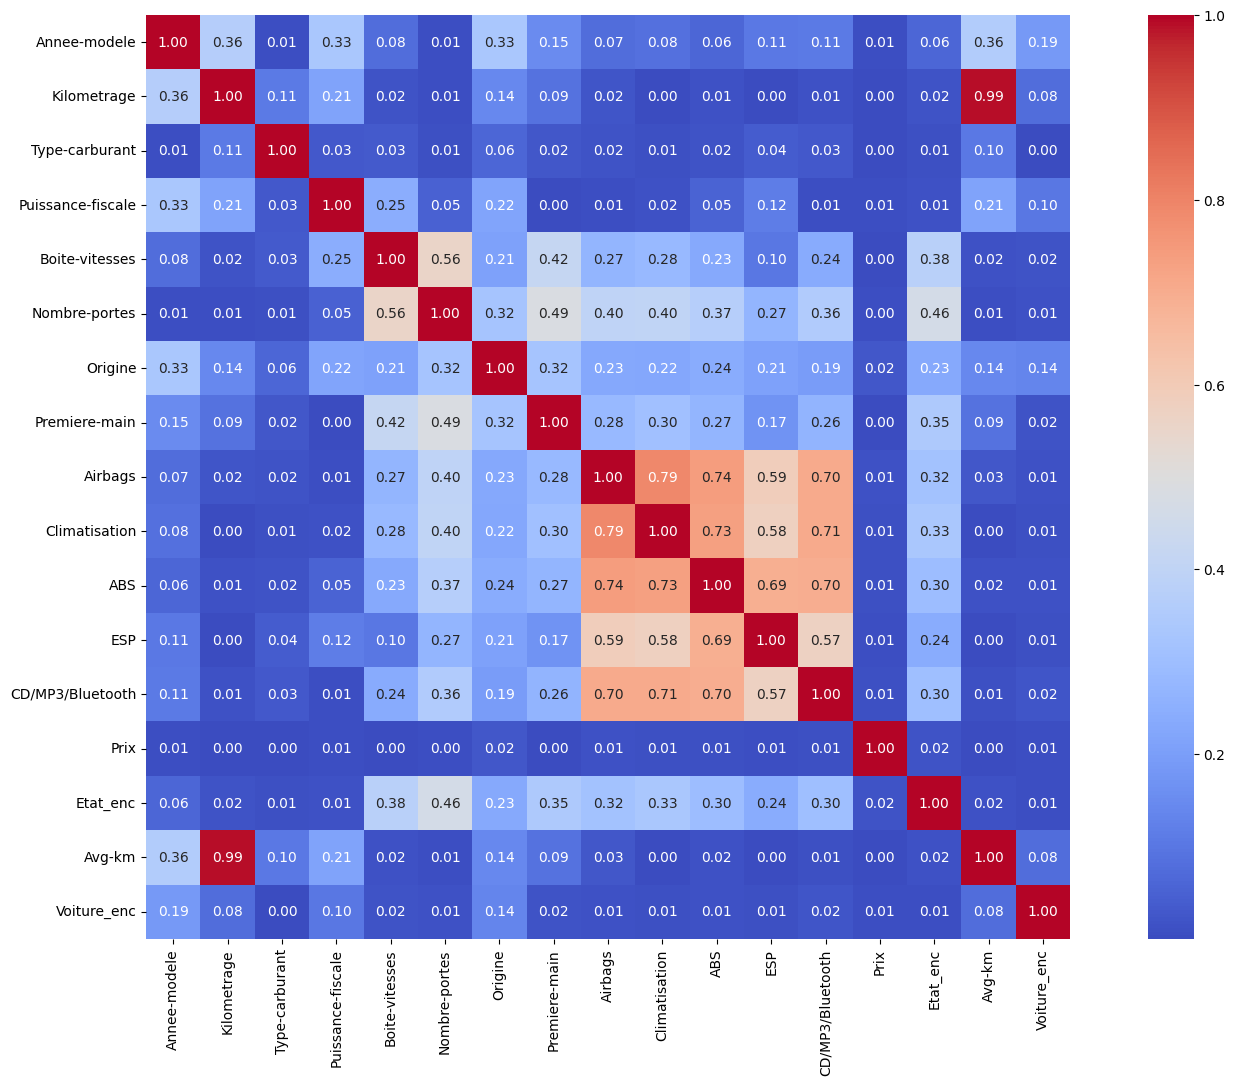

In [44]:
# Calculer la matrice de corrélation entre les variables numériques
corr_data = data_set.loc[:, numericals].corr()

# Créer une figure avec la taille spécifiée
plt.figure(figsize=(20, 12))

# Tracer la heatmap de la matrice de corrélation avec les annotations et le format spécifié
sns.heatmap(corr_data.abs(), annot=True, fmt='.2f', cmap='coolwarm', square=True)

# Afficher la heatmap
plt.show()


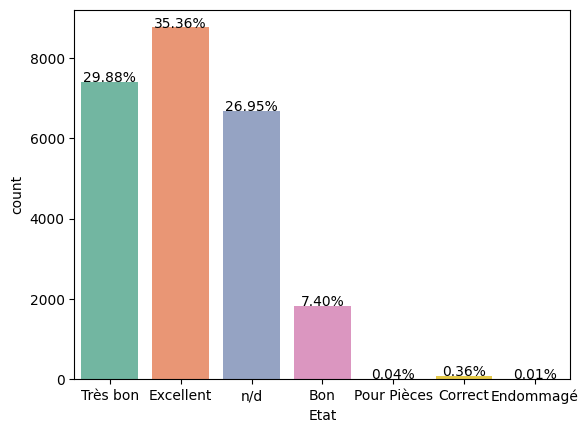

In [55]:
# Create the countplot with hue='Etat' and legend=False
ax = sns.countplot(data=data_set, x='Etat', hue='Etat', palette='Set2', legend=False)

# Add percentages on top of each bar
total = len(data_set['Etat'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format((height / total) * 100), ha="center")

# Show the plot
plt.show()

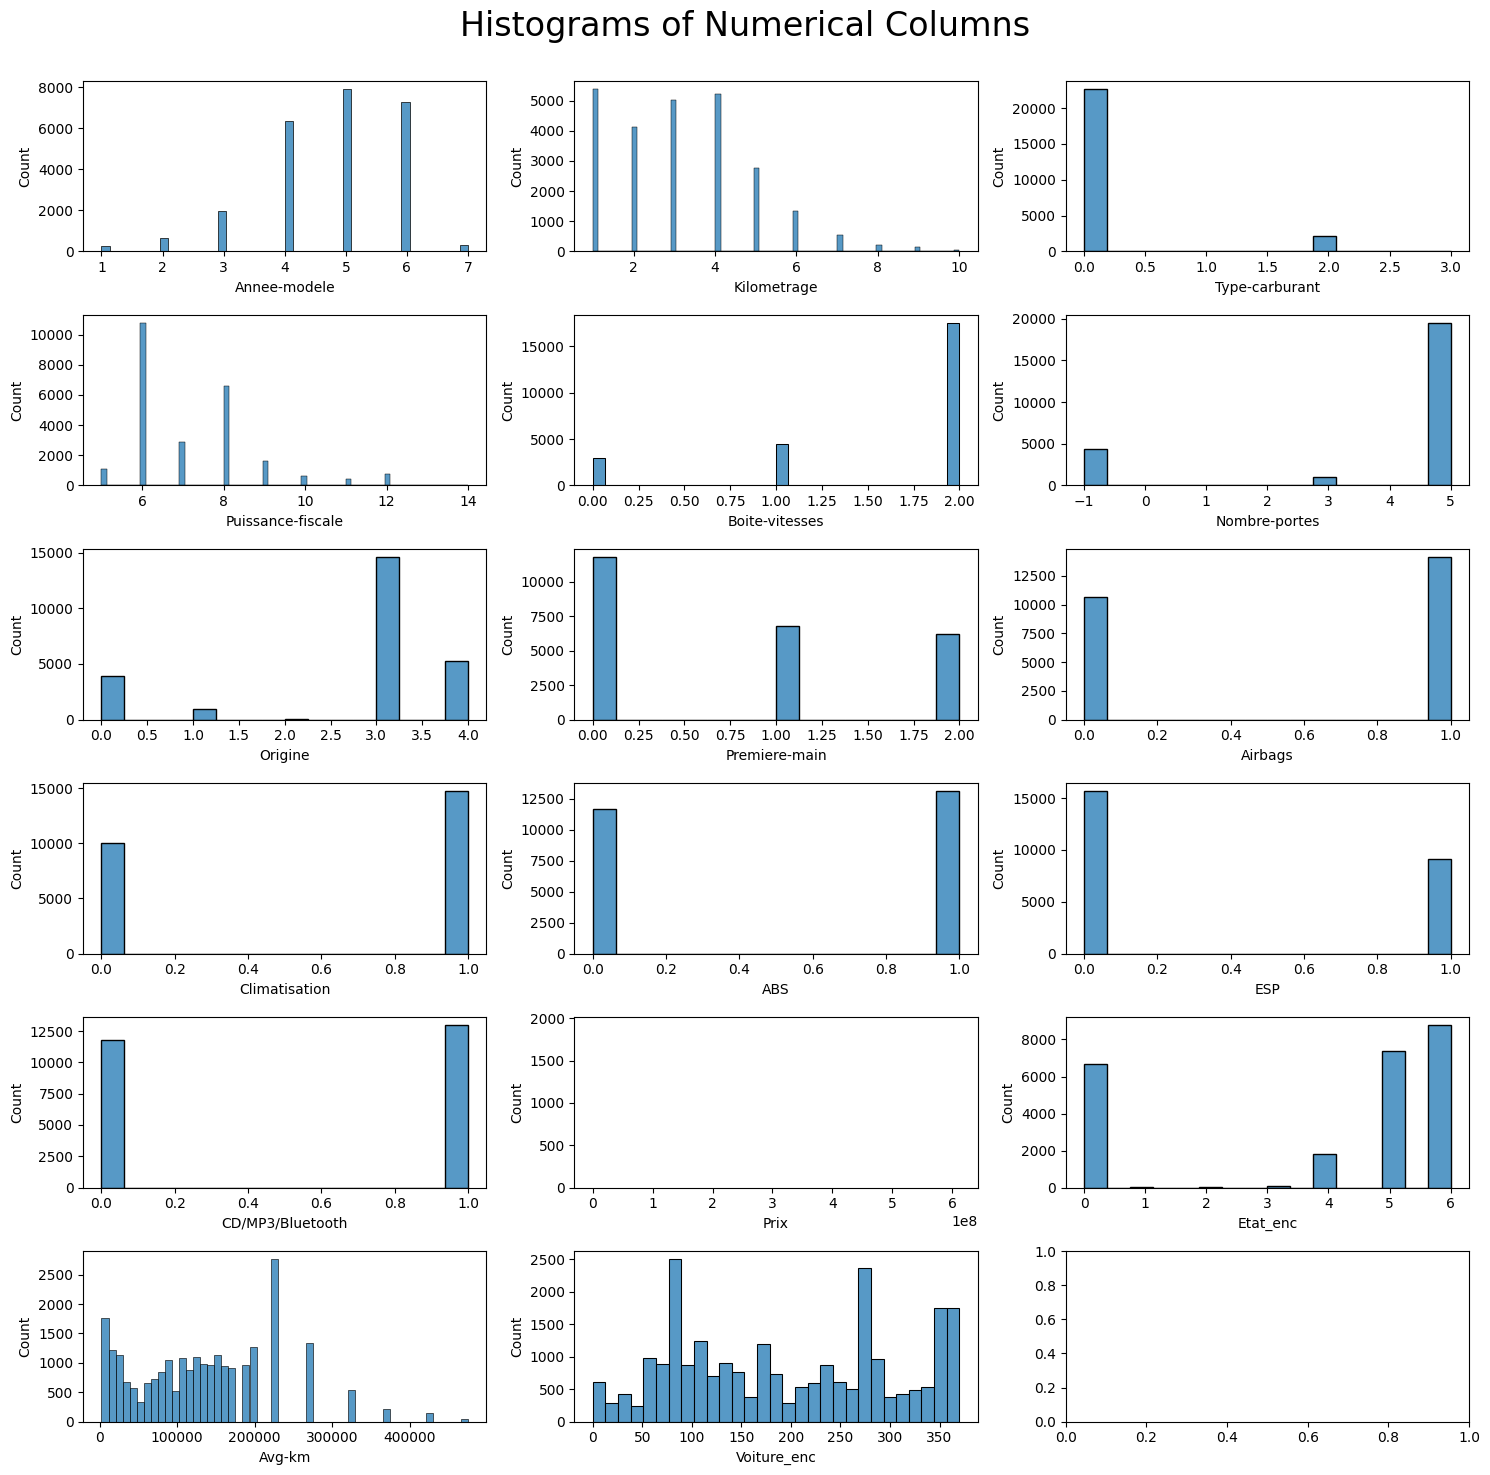

In [58]:
# Calculer le nombre de lignes pour les sous-graphiques en fonction du nombre de variables numériques
norow = len(numericals) // 3 + 1

# Créer une figure et des axes pour les sous-graphiques avec la taille spécifiée
fig, ax = plt.subplots(norow, 3, figsize=(15, 15))

# Titre de la figure
plt.suptitle('Histogrammes des colonnes numériques\n', horizontalalignment="center", fontstyle="normal", fontsize=24, fontfamily="sans-serif")

# Boucle sur les variables numériques et les indices pour tracer les histogrammes
for i, d in enumerate(numericals):
    if i < 3:
        chart = sns.histplot(x=data_set.loc[:, d], data=data_set, ax=ax[0, i])
    else:
        chart = sns.histplot(x=data_set.loc[:, d], data=data_set, ax=ax[i // 3, i % 3])

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


## LR

Mean Squared Error (Scaled): 8.424951845306605
Mean Absolute Error (Scaled): 2.1270273634472168
R-squared (Scaled): -7.4249518453066035


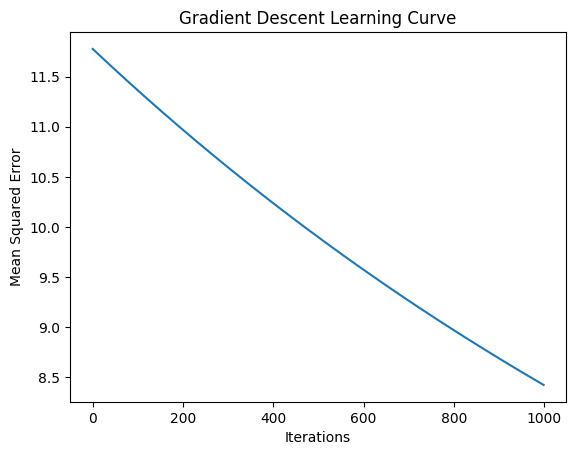

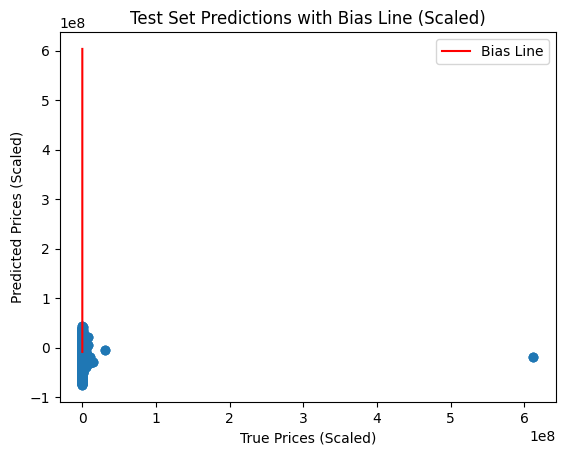

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Preprocess the dataset
# Define the features (independent variables) and the target variable
X = data_set[['Annee-modele', 'Kilometrage', 'Type-carburant', 'Puissance-fiscale',
              'Boite-vitesses', 'Nombre-portes', 'Origine', 'Premiere-main',
              'Airbags', 'Climatisation', 'ABS', 'ESP', 'CD/MP3/Bluetooth', 'Avg-km']]
y = data_set['Prix']

# Scale the features and the target variable
scaler = StandardScaler()  # Initialize StandardScaler
X_scaled = scaler.fit_transform(X)  # Scale features
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Scale target variable

# Add a column of ones to represent the bias in the features
X_scaled = np.hstack((X_scaled, np.ones((X_scaled.shape[0], 1))))  # Add bias column

# Initialize theta with random values
theta = np.random.randn(X_scaled.shape[1], 1)

# Define the hypothesis function
def hypothesis(X, theta):
    return X.dot(theta)

# Define the mean squared error function
def mean_squared_error_custom(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the gradient function
def gradient(X, y, theta):
    m = len(y)
    return 1 / m * X.T.dot(hypothesis(X, theta) - y)

# Define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    history_error = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta)
        history_error[i] = mean_squared_error_custom(y, hypothesis(X, theta))
    return theta, history_error

# Set hyperparameters
learning_rate = 0.0001
n_iterations = 1000

# Train the model using gradient descent
theta_final, history_error = gradient_descent(X_scaled, y_scaled, theta, learning_rate, n_iterations)

# Evaluate the model
y_pred_scaled = hypothesis(X_scaled, theta_final)
mse = mean_squared_error(y_scaled, y_pred_scaled)
mae = mean_absolute_error(y_scaled, y_pred_scaled)
r2 = r2_score(y_scaled, y_pred_scaled)

# Inverse-transform the predicted and actual values to get the original scale
y_pred_scaled = scaler.inverse_transform(y_pred_scaled)
y_scaled = scaler.inverse_transform(y_scaled)

print("Mean Squared Error (Scaled):", mse)
print("Mean Absolute Error (Scaled):", mae)
print("R-squared (Scaled):", r2)

# Plot the learning curve
plt.plot(range(n_iterations), history_error)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent Learning Curve")
plt.show()

# Plot the test set predictions with a bias line
plt.scatter(y_scaled.ravel(), y_pred_scaled.ravel())
plt.xlabel("True Prices (Scaled)")
plt.ylabel("Predicted Prices (Scaled)")
plt.title("Test Set Predictions with Bias Line (Scaled)")

# Calculate the mean of the true values and the predicted values
mean_y_scaled = np.mean(y_scaled.ravel())
mean_y_pred_scaled = np.mean(y_pred_scaled.ravel())

# Calculate the slope
slope = 1

# Calculate the intercept
intercept = mean_y_pred_scaled - slope * mean_y_scaled

# Add the bias line
xs = np.array(range(1, len(y_scaled) + 1))
xs = xs / max(xs)
plt.plot(xs, slope * xs * y_scaled.max() + intercept, color='red', label="Bias Line")
plt.legend()
plt.show()


Mean Squared Error: 714733019734.9762
Mean Absolute Error: 389390.74650154985
R-squared: -0.4075028892571113


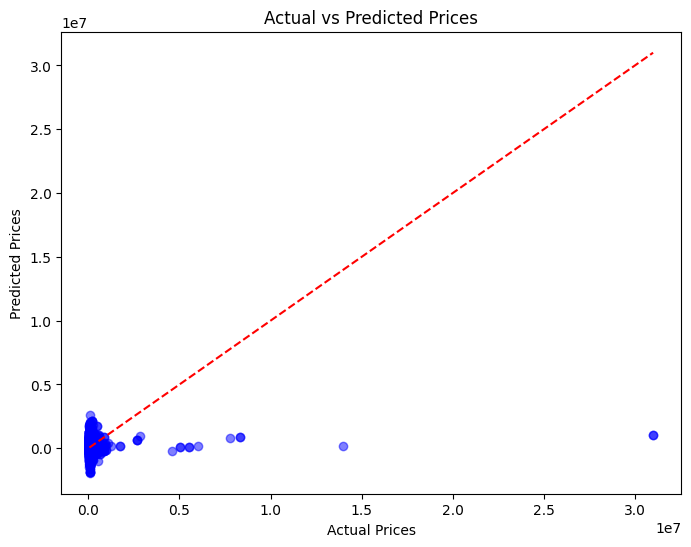

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preprocess the dataset
# Define the features (independent variables) and the target variable
X = data_set[['Annee-modele', 'Kilometrage', 'Type-carburant', 'Puissance-fiscale',
              'Boite-vitesses', 'Nombre-portes', 'Origine', 'Premiere-main',
              'Airbags', 'Climatisation', 'ABS', 'ESP', 'CD/MP3/Bluetooth', 'Avg-km']]
y = data_set['Prix']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()